In [7]:
from WindPy import w
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [52]:
df = pd.read_excel('D:/Data/risk/repo_amt.xlsx')

In [53]:
df.tail()

,131800.SZ,131801.SZ,131802.SZ,131803.SZ,131805.SZ,131806.SZ,131809.SZ,131810.SZ,131811.SZ,202001.SH,...,205273.SH,206001.SH,206007.SH,206014.SH,206021.SH,206030.SH,206090.SH,206180.SH,206270.SH,206365.SH
2018-05-04,50.01448,37.52829,4.26624,3.85265,0.10474,0.06843,10.01862,728.34157,7.23121,0,...,0,0.0000,84.9159,14.9325,1.8700,0.5000,7.2879,0.390,0.0,0.00
2018-05-07,9.51946,56.64400,5.70969,6.69644,0.09142,0.04640,6.98323,734.48043,8.86173,0,...,0,9.7418,45.1249,29.4145,5.8015,17.3437,5.8981,0.000,0.0,0.00
2018-05-08,6.58827,39.58330,7.21058,3.25676,0.13420,0.07463,4.60208,681.96793,5.98379,0,...,0,9.9945,42.5128,21.6046,5.4891,18.3918,7.2048,0.396,0.0,0.65
2018-05-09,5.12423,78.25004,10.49151,3.76590,0.18969,0.07787,3.48983,679.94220,12.53979,0,...,0,9.5707,92.1659,22.8769,2.6164,17.8564,11.1211,0.000,0.0,0.00
2018-05-10,7.97820,44.78857,6.46283,3.29316,0.15789,0.04969,11.00965,666.21884,11.23020,0,...,0,8.4749,83.3778,31.7772,0.0000,17.6564,8.5179,0.000,0.0,0.00


In [54]:
repo_df = pd.read_excel('D:/Data/risk/repo_const.xlsx')

In [63]:
repo_df = repo_df.set_index('code')

In [65]:
(repo_df['day'] * df.iloc[-1]).sum() / df.iloc[-1].sum()

2.4739869056967367

In [70]:
weighted_repo = df.mul(repo_df['day']).sum(axis=1) / df.sum(axis=1)

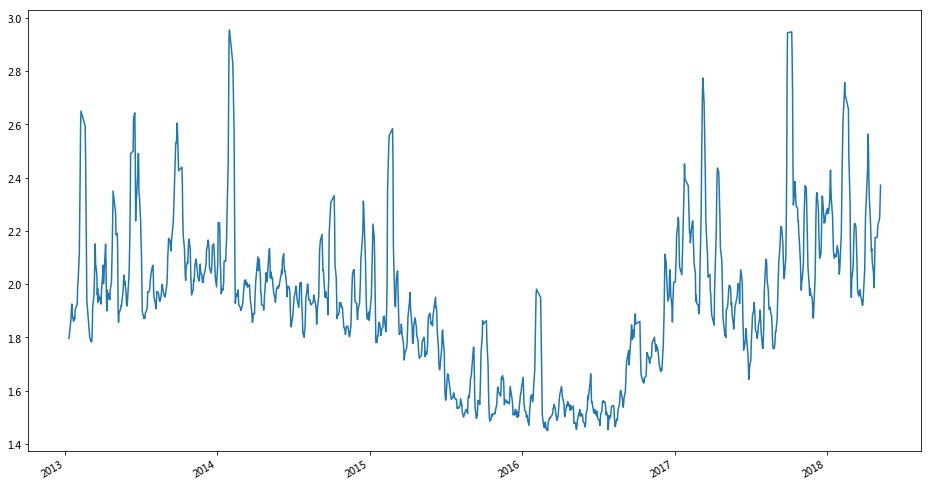

In [83]:
weighted_repo.rolling(window=5).mean().plot(figsize=(16, 9))

In [79]:
rolling_mean = weighted_repo.rolling(window=243).apply(lambda x: (x[-1] - x.mean()) / x.std())